In [1]:
import matplotlib.pyplot as plt

In [17]:
import os, sys
import numpy as np
from tqdm import tqdm
import pandas as pd

In [9]:
def get_pairs(pair_dir, loc_which, num_iter):
    target_dir = os.path.join(pair_dir, loc_which)
    pairs = {}
    for i in tqdm(range(num_iter)):
        df = pd.read_csv(os.path.join(pair_dir,"{}/{}.pairs.csv".format(loc_which, i)), sep =";", header = None)
        pairs[i] = df
        pairs[i][0] = [eval(v) for v in pairs[i][0]]
        
    return pairs

In [118]:
def compute_roc_auc(loc_df, gts, idx_to_tl = None):
    from sklearn.metrics import auc

    recall_per_ranks = []
    
    if idx_to_tl is not None:
        _gts = []
        for gt in gts:
            if gt[0] == idx_to_tl:
                _gts.append(gt)
        gts = _gts
        
        indices = [i for i,v in enumerate(loc_df[0].values) if v[0] == idx_to_tl]
        loc_df = loc_df.iloc[indices]
    
    num = len(loc_df)
    num_gts = len(gts)
    
    #print (num, num_gts)
    ranks_of_gts = loc_df.loc[loc_df[0].isin(gts)][1].values
    #print ("range", np.min(ranks_of_gts), np.median(ranks_of_gts), np.max(ranks_of_gts))
    #print ("\t", ranks_of_gts[:10])
    recall_per_ranks = []
    for i in range(num):
        r = loc_df.iloc[i][1]
        cnt = np.sum(ranks_of_gts <= r)
        #print (r, cnt)
        recall_per_ranks.append(cnt/num_gts)
        
    xs = np.arange(num)
    auc_score = auc(xs, recall_per_ranks)
    
    return auc_score, list(zip(xs, recall_per_ranks))

In [21]:
import pickle

c10_gts_dir = "data/gts/rq1/cifar10"
c10_gts = {}
for i in range(30):
    df = pd.read_pickle("data/gts/rq1/cifar10/rq1.seed{}.gts.pkl".format(i))
    #with open("data/gts/rq1/cifar10/rq1.seed{}.gts.pkl".format(i), 'rb') as f:
    #    df = pickle.load(f)
    gt_lst = []
    for l in df.keys():
        gt_lst.extend([(l,idx) for idx in df[l]])
    
    c10_gts[i] = gt_lst

In [11]:
c10_pair_dir = "results/rq1/all_layers/simple_cm/pairs"

In [18]:
c10_loc_pairs = get_pairs(c10_pair_dir, 'localiser', 30)

100%|██████████| 30/30 [02:36<00:00,  5.22s/it]


In [39]:
target_layers = sorted(list(set([vs[0] for vs in c10_gts[0]])))
target_layers

[2, 7, 9]

In [49]:
c10_gts[0]

[(2, (0, 0, 0, 10)),
 (2, (0, 0, 1, 8)),
 (2, (0, 0, 2, 2)),
 (2, (0, 1, 0, 4)),
 (2, (0, 1, 0, 11)),
 (2, (0, 2, 0, 6)),
 (2, (0, 2, 0, 11)),
 (2, (0, 2, 2, 0)),
 (2, (1, 0, 0, 10)),
 (2, (1, 0, 2, 7)),
 (2, (1, 0, 2, 15)),
 (2, (1, 1, 0, 14)),
 (2, (1, 1, 2, 3)),
 (2, (1, 2, 1, 4)),
 (2, (1, 2, 1, 5)),
 (2, (2, 0, 1, 9)),
 (2, (2, 0, 1, 15)),
 (2, (2, 1, 1, 2)),
 (2, (2, 1, 1, 10)),
 (2, (2, 1, 1, 15)),
 (2, (2, 1, 2, 1)),
 (2, (2, 1, 2, 12)),
 (2, (2, 2, 0, 0)),
 (2, (2, 2, 0, 13)),
 (2, (2, 2, 1, 14)),
 (2, (2, 2, 2, 13)),
 (7, (0, 23)),
 (7, (0, 33)),
 (7, (0, 37)),
 (7, (0, 44)),
 (7, (0, 72)),
 (7, (0, 120)),
 (7, (0, 132)),
 (7, (0, 170)),
 (7, (0, 237)),
 (7, (0, 239)),
 (7, (0, 242)),
 (7, (0, 263)),
 (7, (0, 275)),
 (7, (0, 282)),
 (7, (0, 299)),
 (7, (0, 309)),
 (7, (0, 310)),
 (7, (0, 311)),
 (7, (0, 328)),
 (7, (0, 388)),
 (7, (0, 398)),
 (7, (0, 406)),
 (7, (0, 409)),
 (7, (0, 415)),
 (7, (0, 446)),
 (7, (0, 459)),
 (7, (0, 469)),
 (7, (0, 476)),
 (7, (0, 490)),
 (7, (1,

In [86]:
c10_loc_pairs[0].iloc[[i for i,v in enumerate(c10_loc_pairs[0][0].values) if v[0] == target_layers[-1]]].iloc[0][1]

6

In [70]:
c10_loc_pairs[0].iloc[5]

0    (9, (312, 0))
1                6
Name: 5, dtype: object

In [127]:
num_last = np.sum([idx[0] == target_layers[1] for idx in c10_loc_pairs[0][0].values])
num_last

524288

In [19]:
c10_gl_pairs = get_pairs(c10_pair_dir, 'gradient_loss', 30)

100%|██████████| 30/30 [02:33<00:00,  5.11s/it]


In [20]:
c10_rd_pairs = get_pairs(c10_pair_dir, 'random', 30)

100%|██████████| 30/30 [02:23<00:00,  4.77s/it]


In [113]:
c10_gts[0]

[(2, (0, 0, 0, 10)),
 (2, (0, 0, 1, 8)),
 (2, (0, 0, 2, 2)),
 (2, (0, 1, 0, 4)),
 (2, (0, 1, 0, 11)),
 (2, (0, 2, 0, 6)),
 (2, (0, 2, 0, 11)),
 (2, (0, 2, 2, 0)),
 (2, (1, 0, 0, 10)),
 (2, (1, 0, 2, 7)),
 (2, (1, 0, 2, 15)),
 (2, (1, 1, 0, 14)),
 (2, (1, 1, 2, 3)),
 (2, (1, 2, 1, 4)),
 (2, (1, 2, 1, 5)),
 (2, (2, 0, 1, 9)),
 (2, (2, 0, 1, 15)),
 (2, (2, 1, 1, 2)),
 (2, (2, 1, 1, 10)),
 (2, (2, 1, 1, 15)),
 (2, (2, 1, 2, 1)),
 (2, (2, 1, 2, 12)),
 (2, (2, 2, 0, 0)),
 (2, (2, 2, 0, 13)),
 (2, (2, 2, 1, 14)),
 (2, (2, 2, 2, 13)),
 (7, (0, 23)),
 (7, (0, 33)),
 (7, (0, 37)),
 (7, (0, 44)),
 (7, (0, 72)),
 (7, (0, 120)),
 (7, (0, 132)),
 (7, (0, 170)),
 (7, (0, 237)),
 (7, (0, 239)),
 (7, (0, 242)),
 (7, (0, 263)),
 (7, (0, 275)),
 (7, (0, 282)),
 (7, (0, 299)),
 (7, (0, 309)),
 (7, (0, 310)),
 (7, (0, 311)),
 (7, (0, 328)),
 (7, (0, 388)),
 (7, (0, 398)),
 (7, (0, 406)),
 (7, (0, 409)),
 (7, (0, 415)),
 (7, (0, 446)),
 (7, (0, 459)),
 (7, (0, 469)),
 (7, (0, 476)),
 (7, (0, 490)),
 (7, (1,

In [22]:
c10_outputs_loc = compute_roc_auc(c10_loc_pairs[0], c10_gts[0])

In [128]:
c10_outputs_loc_last = compute_roc_auc(c10_loc_pairs[0], c10_gts[0], idx_to_tl = target_layers[1])

KeyboardInterrupt: 

In [121]:
c10_outputs_loc_last[0]/num_last

0.4277955840455841

In [28]:
num = len(c10_loc_pairs[0])

In [65]:
num_last

5120

In [66]:
c10_outputs_loc_last[0]

409982.4409594096

In [96]:
c10_outputs_loc[0]/num
c10_outputs_loc_last[0]/num_last

0.47323678217250925

In [23]:
c10_outputs_gl = compute_roc_auc(c10_gl_pairs[0], c10_gts[0])

In [124]:
c10_outputs_gl_last = compute_roc_auc(c10_gl_pairs[0], c10_gts[0], idx_to_tl = target_layers[0])

In [125]:
c10_outputs_gl[0]/num
c10_outputs_gl_last[0]/num_last

0.4308671652421652

In [24]:
c10_outputs_rd = compute_roc_auc(c10_rd_pairs[0], c10_gts[0])

In [95]:
c10_outputs_rd_last = compute_roc_auc(c10_rd_pairs[0], c10_gts[0], idx_to_tl = target_layers[-1])

In [98]:
c10_outputs_rd[0]/num
c10_outputs_rd_last[0]/num_last

0.46847721113929897

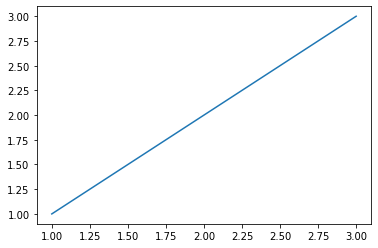

In [2]:
plt.plot([1,2,3], [1,2,3])

In [3]:
import pickle

In [4]:
with open("loc.pkl", 'rb') as f:
    c10_outputs_loc = pickle.load(f)

In [7]:
c10_outputs_loc

[(0, 0.0),
 (1, 3.7956426022925684e-05),
 (2, 3.7956426022925684e-05),
 (3, 3.7956426022925684e-05),
 (4, 3.7956426022925684e-05),
 (5, 3.7956426022925684e-05),
 (6, 3.7956426022925684e-05),
 (7, 3.7956426022925684e-05),
 (8, 3.7956426022925684e-05),
 (9, 3.7956426022925684e-05),
 (10, 3.7956426022925684e-05),
 (11, 3.7956426022925684e-05),
 (12, 3.7956426022925684e-05),
 (13, 3.7956426022925684e-05),
 (14, 7.591285204585137e-05),
 (15, 7.591285204585137e-05),
 (16, 7.591285204585137e-05),
 (17, 7.591285204585137e-05),
 (18, 7.591285204585137e-05),
 (19, 7.591285204585137e-05),
 (20, 7.591285204585137e-05),
 (21, 7.591285204585137e-05),
 (22, 7.591285204585137e-05),
 (23, 7.591285204585137e-05),
 (24, 7.591285204585137e-05),
 (25, 7.591285204585137e-05),
 (26, 7.591285204585137e-05),
 (27, 7.591285204585137e-05),
 (28, 7.591285204585137e-05),
 (29, 7.591285204585137e-05),
 (30, 7.591285204585137e-05),
 (31, 7.591285204585137e-05),
 (32, 7.591285204585137e-05),
 (33, 0.00011386927806877

In [5]:
with open("gl.pkl", 'rb') as f:
    c10_outputs_gl = pickle.load(f)
    
with open("rd.pkl", 'rb') as f:
    c10_outputs_rd = pickle.load(f)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


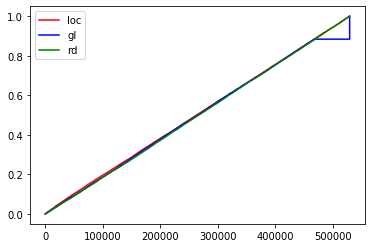

In [33]:
#import matplotlib.pyplot as plt

plt.plot([v[0] for v in c10_outputs_loc[1]], [v[1] for v in c10_outputs_loc[1]], "r-", label='loc')
plt.plot([v[0] for v in c10_outputs_gl[1]], [v[1] for v in c10_outputs_gl[1]], "b-", label='gl')
plt.plot([v[0] for v in c10_outputs_rd[1]], [v[1] for v in c10_outputs_rd[1]], "g-", label='rd')

plt.legend()
plt.show()

... maybe the artificial faults might be wrong ... and the neural weights to patch and the neural weights responsible for the failure might be different. 
-> can we show this by comparing the latter goal's results from the implementation of "suspicious neural weights" using DeepFL

although I have look through the localisation results of each layer, nothing interseting has been found. 